In [2]:
# from argparse import ArgumentParser

import argparse
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import cv2
import matplotlib.pyplot as plt

In [3]:
config = './configs/swin/mask_rcnn_swin_tiny_patch4_window7_mstrain_480-800_adamw_1x_coco.py'
checkpoint = './mask_rcnn_swin_tiny_patch4_window7_1x.pth'
init_dict = {
    'config':config, 
    'checkpoint': checkpoint,
    'score_thr':0.3,
    'img':'./demo/demo.jpg',
    'device':'cpu'
}
args = argparse.Namespace(**init_dict)

model = init_detector(args.config, args.checkpoint, device=args.device)
# test a single image
img = cv2.imread(args.img)
result = inference_detector(model, img)

c:\Users\User\anaconda3\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


load checkpoint from local path: ./mask_rcnn_swin_tiny_patch4_window7_1x.pth


c:\Users\User\Desktop\Data\Swin-Transformer\object_detection\Swin-Transformer-Object-Detection\mmdet\datasets\utils.py:64: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
c:\Users\User\Desktop\Data\Swin-Transformer\object_detection\Swin-Transformer-Object-Detection\mmdet\models\roi_heads\bbox_heads\bbox_head.py:353: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:210.)
  scale_factor = bboxes.new_tensor(scale_factor).unsqueeze(1).repeat(


In [22]:
import numpy as np
import torch
import mmcv
from mmdet.core.visualization import imshow_det_bboxes

if isinstance(result, tuple):
    bbox_result, segm_result = result
    if isinstance(segm_result, tuple):
        segm_result = segm_result[0]  # ms rcnn
else:
    bbox_result, segm_result = result, None
bboxes = np.vstack(bbox_result)
labels = [
    np.full(bbox.shape[0], i, dtype=np.int32)
    for i, bbox in enumerate(bbox_result)
]
labels = np.concatenate(labels)
# draw segmentation masks
segms = None
if segm_result is not None and len(labels) > 0:  # non empty
    segms = mmcv.concat_list(segm_result)
    if isinstance(segms[0], torch.Tensor):
        segms = torch.stack(segms, dim=0).detach().cpu().numpy()
    else:
        segms = np.stack(segms, axis=0)

if args.score_thr > 0:
    assert bboxes.shape[1] == 5
    scores = bboxes[:, -1]
    inds = scores > args.score_thr
    bboxes = bboxes[inds, :]
    labels = labels[inds]
    if segms is not None:
        segms = segms[inds, ...]     
        


array(['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'bench', 'bench', 'bench',
       'chair'], dtype='<U14')

In [23]:
draw_img = model.show_result(img, result ,score_thr = 0.9)


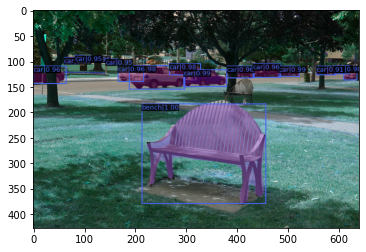

In [24]:
plt.imshow(draw_img)